# Trabajo Práctico 2: Análisis con Voting - Organización de Datos

## Importamos las bibiliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import tree

In [4]:
from preprocessing import prepararSetDeDatos
from preprocessing import prepararSetDeValidacion
from preprocessing import arbolDeDecisionPreprocessing
from preprocessing import rlPreprocessing

In [5]:
from funcionesAuxiliares import mostrarAUCScore
from funcionesAuxiliares import mostrarROCCurve
from funcionesAuxiliares import mostrarMatrizDeConfusion
from funcionesAuxiliares import escribirPrediccionesAArchivo

## Importamos los datos y los procesamos

In [6]:
X = pd.read_csv('Datasets/tp-2020-2c-train-cols2.csv')
y = pd.read_csv('Datasets/tp-2020-2c-train-cols1.csv')
X = prepararSetDeDatos(X)
y = prepararSetDeValidacion(y)

## Voting

Este modelo es un ensamble que consiste en la union de varios modelos, los cuales votaran de que clase es una instancia. En este caso, decidimos armar el ensamble utilizando los modelos que mejores resultados (segun la metrica AUC-ROC) nos dieron en los otros notebooks.
Los elegidos fueron:
 * Arbol de decicion
 * SVM
 * Random Forest
 * Regresion logistica

Cada uno de estos modelos lo recreamos con los mejores hiperparametros que se encontraron en su notebook.

Para el preprocesamiento se decidio utilizar el mismo que para regresion logistica y SVM, el cual normaliza las variables ademas de aplicar la misma conversion que arboles de decision y random forest.

In [7]:
X_voting = rlPreprocessing(X) #CREAR voting PREPROCESSING

Dividimos el set de datos en sets de training y test.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_voting, y, test_size=0.25, random_state=0)

Inicializamos los modelos que usara Voting, cada uno con sus mejores hipoerparametros encontrados. En el caso de random forest se les redujo algo la profundidad.

In [9]:
regresion_logistica = LogisticRegression(penalty = 'none', solver = "saga",max_iter = 5000)
random_forest = RandomForestClassifier(n_estimators=100, random_state=0,criterion='entropy',max_depth=7)
svm = SVC(C=200, kernel='rbf', gamma=0.1,probability=True)
arbol = tree.DecisionTreeClassifier(random_state=117, max_depth=4, criterion = 'gini')

Creamos el modelo y lo entrenamos.

In [10]:
voting = VotingClassifier(estimators=[('lr', regresion_logistica), ('rf', random_forest),('svm',svm),('tree',arbol)], voting='soft')

In [11]:
voting.fit(X_train, y_train)

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=5000, penalty='none',
                                                 solver='saga')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=7,
                                                     random_state=0)),
                             ('svm', SVC(C=200, gamma=0.1, probability=True)),
                             ('tree',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=117))],
                 voting='soft')

#### Evaluacion de metricas

Ahora si, realizamos las predicciones y observamos las metricas.

In [12]:
y_pred = voting.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred, target_names=['No vuelve','Vuelve']))

              precision    recall  f1-score   support

   No vuelve       0.83      0.91      0.87       121
      Vuelve       0.84      0.72      0.78        80

    accuracy                           0.84       201
   macro avg       0.84      0.82      0.82       201
weighted avg       0.84      0.84      0.83       201



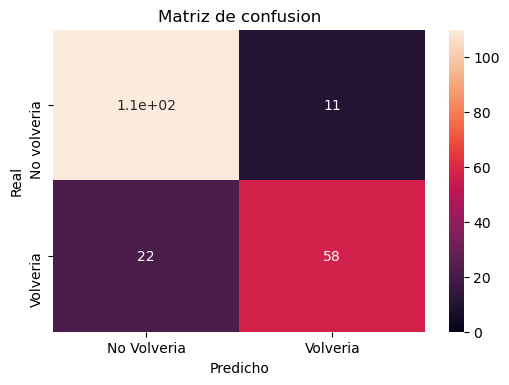

In [14]:
mostrarMatrizDeConfusion(y_pred,y_test)

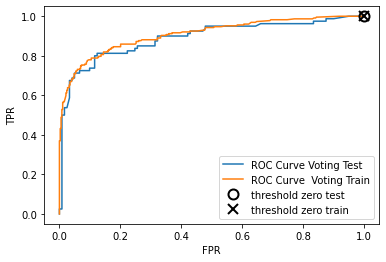

In [15]:
mostrarROCCurve(voting,"Voting",X_test,X_train,y_test,y_train)

In [16]:
mostrarAUCScore(voting,"Voting",X_test,y_test)

AUC para Voting: 0.890


Observamos que obtuvimos una mejora en comparacion a los otros modelos en varias de las metricas, por no decir todas.

## Predicciones sobre el nuevo archivo

Realizamos ahora las predicciones del nuevo archivo entregado.

In [17]:
holdout = pd.read_csv('Datasets/tp-2020-2c-holdout-cols2.csv')

holdout = prepararSetDeDatos(holdout)
holdout_voting = arbolDeDecisionPreprocessing(holdout) ### TODO CAMBIAR AL QUE CORRESPONDA

Realizamos las predicciones y escribimos al archivo CSV.

In [18]:
#predicciones_holdout = rl.predict(holdout_voting)

In [19]:
#predicciones_holdout

In [20]:
#escribirPrediccionesAArchivo(predicciones_holdout,"Voting")